_AutoEncoders_

1. MNIST dataset compression and reconstruction using PCA and AutoEncoder.
	1. Train a PCA model to compress the digits to 4 dimensional latent vectors.
	1. Train an AutoEncoder model to compress the digits to 4 dimensional latent vectors.
	1. Visualize the latent vectors using TSNE (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for both the cases.
	1. Show reconstruction for 20 latent samples using both models.
	1. What is the compression ratio achieved?

1. Train an autoencoder model for anomaly classification
	1. Use the dataset assigned for your group.
	1. Train model only on normal set. 
	1. Reconstruct on the test set and show the reconstruction error.
	1. What is the latent dimension?
	1. Plot TSNE for the test set.
	1. What is the threshold value of reconstruction error to classify as normal or anomalous ?

	Group1: 
		Dataset: Melanoma/Non Melanoma dataset
		Normal set: Non Melanoma set
		Link: Use the split created in the last assignment from the train set.
		Students: [CS22B1003 : CS22B2031]
		
	Group2: 
		Dataset: Normal/Cataract disease dataset
		Normal set: Normal
		Link: normal_cataract.zip 
		Students: [CS22B2032 : all others]


1. Train a VAE model for generating new data similar to training set.
	1. Train the model on fashionMNIST dataset.
	1. Generate 30 new samples using the learned model and plot them.

	Dataset: fashionMNIST (https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#get-the-data)


### Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

2025-03-10 09:06:03.134992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741597565.492743    6684 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741597566.157604    6684 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 09:06:11.555720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

In [4]:
pca = sklearn.decomposition.PCA(n_components=4)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)
x_reconstructed_pca = pca.inverse_transform(pca_test)

In [5]:
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(4, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

autoencoder=tf.keras.models.Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse',metrics=["accuracy","precision","recall"])

autoencoder.summary()

I0000 00:00:1741597686.402203    6684 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,772 (854.58 KB)

 Trainable params: 218,772 (854.58 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20


I0000 00:00:1741597696.234593    7463 service.cc:148] XLA service 0x7fb94c00d740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741597696.235856    7463 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-10 09:08:16.829489: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741597697.879961    7463 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-10 09:08:19.245522: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_278', 4 bytes spill stores, 4 bytes spill loads

2025-03-10 09:08:19.309459: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_271', 2

 25/235 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 8.3412e-04 - loss: 0.1982 - precision: 0.2464 - recall: 0.3425

I0000 00:00:1741597715.778562    7463 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0057 - loss: 0.1021 - precision: 0.4928 - recall: 0.2437

2025-03-10 09:08:38.412577: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_271', 96 bytes spill stores, 120 bytes spill loads

2025-03-10 09:08:39.488242: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_278', 4 bytes spill stores, 4 bytes spill loads

2025-03-10 09:08:41.902393: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_292', 160 bytes spill stores, 160 bytes spill loads

2025-03-10 09:08:42.445557: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_299', 112 bytes spill stores, 128 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.0058 - loss: 0.1018 - precision: 0.4947 - recall: 0.2440
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0084 - loss: 0.0570 - precision: 0.7953 - recall: 0.3460
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0133 - loss: 0.0520 - precision: 0.8353 - recall: 0.3733
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0144 - loss: 0.0493 - precision: 0.8480 - recall: 0.4065
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0166 - loss: 0.0477 - precision: 0.8522 - recall: 0.4281
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0151 - loss: 0.0466 - precision: 0.8562 - recall: 0.4392
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0161 - loss: 0.0446 - precision: 0.8626 - recall: 0.4696
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0135 - loss: 0.0414 - precision: 0.8743 - recall: 0.5170
Epoch 9/20
235/235 ━━━━━━

In [7]:
x_reconstructed_ae = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step


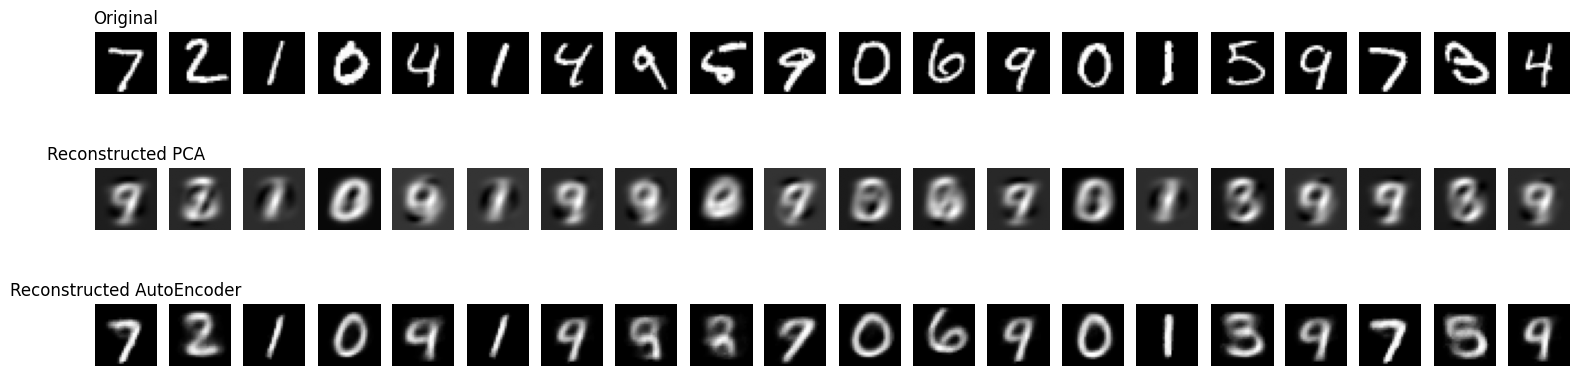

In [8]:
def plot_images(original, pca_reconstructed, ae_reconstructed, n=20):
    plt.figure(figsize=(20, 5))

    n+=1
    plt.subplot(3,n,1).set_title("Original")
    plt.subplot(3,n,1+n).set_title("Reconstructed PCA")
    plt.subplot(3,n,1+2*n).set_title("Reconstructed AutoEncoder")
    for i in range(n-1):
        # Original
        plt.subplot(3, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        
        # PCA Reconstructed
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(pca_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        
        # Autoencoder Reconstructed
        plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(ae_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

plot_images(x_test,x_reconstructed_pca,x_reconstructed_ae)

In [9]:
encoder = tf.keras.models.Model(input_img, encoded)
latent_ae_train = encoder.predict(x_train)
latent_ae_test = encoder.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


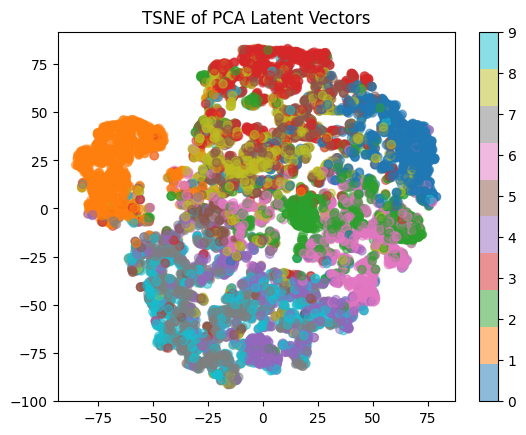

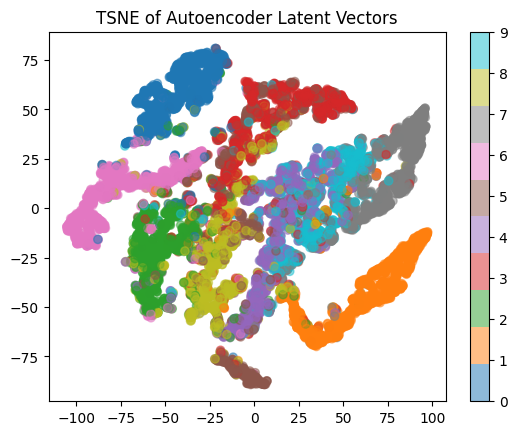

In [10]:
def plot_tsne(latent, labels,title=""):
    tsne = sklearn.manifold.TSNE(n_components=2, random_state=42)
    latent_tsne = tsne.fit_transform(latent)
    
    plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=labels, cmap='tab10', alpha=0.5)
    plt.colorbar()
    plt.title(title)
    
    plt.show()

plot_tsne(pca_train[:10000],y_train[:10000],title='TSNE of PCA Latent Vectors')
plot_tsne(latent_ae_train[:10000],y_train[:10000],title='TSNE of Autoencoder Latent Vectors')

In [16]:
original_size = 28 * 28  # 784 pixels
compressed_size = 4
compression_ratio =  original_size/compressed_size
print(f"Compression Ratio: {compression_ratio}")

Compression Ratio: 196.0


In [12]:
x_reconstructed_ae=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
mse_ae=np.mean((x_test-x_reconstructed_ae)**2)
print(f"Reconstruction Error: {mse_ae:.6f}")

Reconstruction Error: 0.036176
